In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, Normalizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("/content/SalaryData_Train.csv")
test = pd.read_csv("/content/SalaryData_Test.csv")
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [3]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train.duplicated().sum()

3258

In [9]:
train[train.duplicated(keep=False)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
12,23,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
16,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,49,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [10]:
train.drop_duplicates(inplace=True)
train.duplicated().sum()

0

In [11]:
test.duplicated().sum()

930

In [12]:
test.drop_duplicates(inplace = True)
test.duplicated().sum()

0

In [13]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [15]:
test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [16]:
pd.crosstab(train['occupation'],train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


In [17]:
pd.crosstab(test['occupation'],test['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1451,252
Armed-Forces,2,3
Craft-repair,1338,391
Exec-managerial,1022,875
Farming-fishing,427,57
Handlers-cleaners,597,51
Machine-op-inspct,801,112
Other-service,1449,64
Priv-house-serv,87,2


<Axes: xlabel='Salary', ylabel='count'>

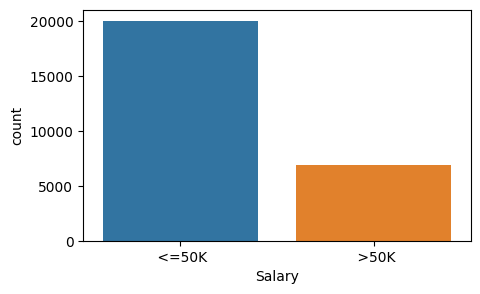

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(data = train, x = 'Salary')

<Axes: xlabel='Salary', ylabel='count'>

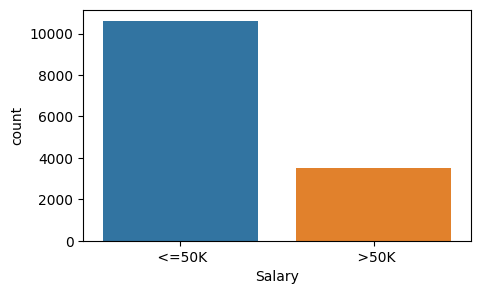

In [19]:
plt.figure(figsize=(5,3))
sns.countplot(data = test, x = 'Salary')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

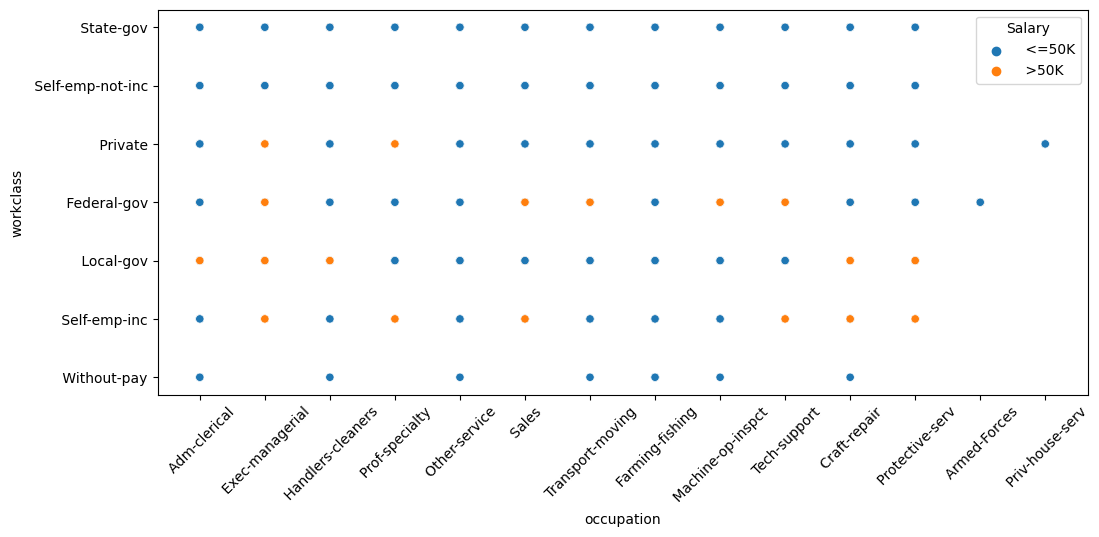

In [20]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=train['occupation'],
                y=train['workclass'],
                hue=train['Salary'])
plt.xticks(rotation=45)

<Axes: xlabel='education'>

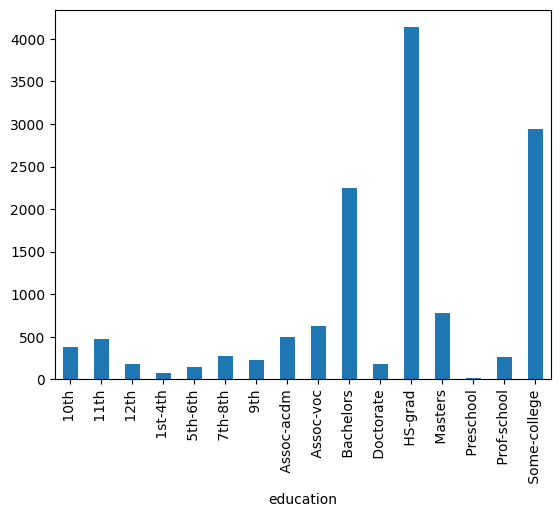

In [21]:
pd.crosstab(train['Salary'], train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

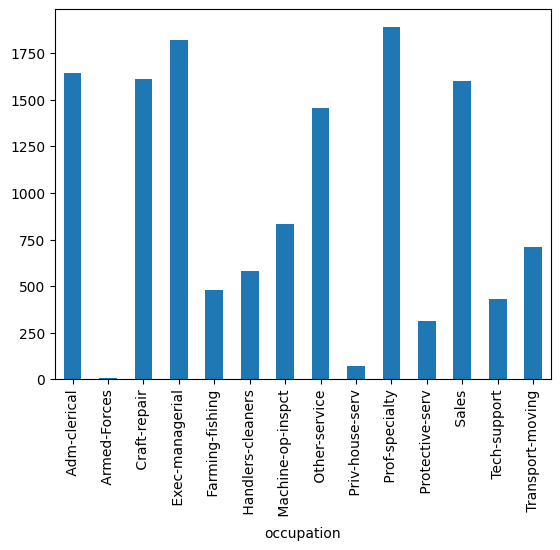

In [22]:
pd.crosstab(train['Salary'], train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

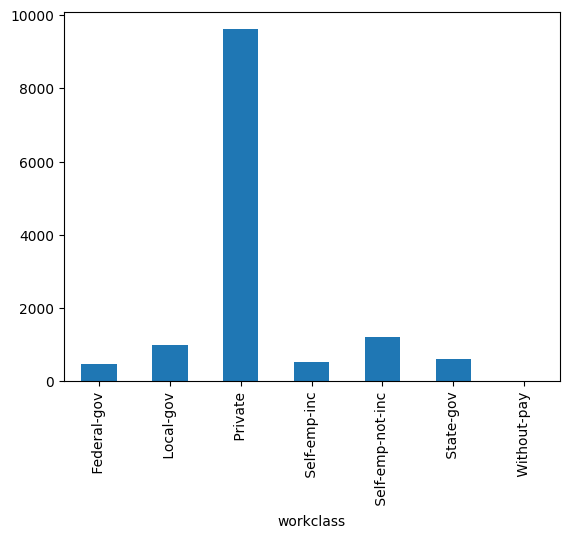

In [23]:
pd.crosstab(train['Salary'], train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

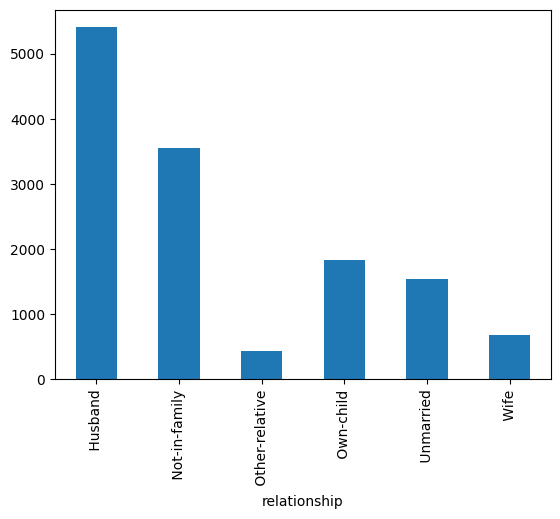

In [24]:
pd.crosstab(train['Salary'], train['relationship']).mean().plot(kind='bar')

In [25]:
# Training data
xtrain = train.iloc[:,:-1]
ytrain = train.iloc[:,-1]

# Testing data
xtest = test.iloc[:,:-1]
ytest = test.iloc[:,-1]

In [26]:
cat_cols = xtrain.select_dtypes(object).columns
cat_cols

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [27]:
oe = OrdinalEncoder()
xtrain[cat_cols] = oe.fit_transform(xtrain[cat_cols])
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2.0,12.0,14,2.0,3.0,0.0,4.0,1.0,0,0,40,37.0
30155,22,2.0,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,37.0
30156,27,2.0,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,37.0
30158,58,2.0,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,37.0


In [28]:
cat_cols = xtest.select_dtypes(object).columns
cat_cols

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [29]:
oe = OrdinalEncoder()
xtest[cat_cols] = oe.fit_transform(xtest[cat_cols])
xtest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2.0,9.0,13,4.0,9.0,3.0,4.0,1.0,0,0,40,37.0
15056,39,2.0,9.0,13,0.0,9.0,1.0,4.0,0.0,0,0,36,37.0
15057,38,2.0,9.0,13,2.0,9.0,0.0,4.0,1.0,0,0,50,37.0
15058,44,2.0,9.0,13,0.0,0.0,3.0,1.0,1.0,5455,0,40,37.0


<Axes: >

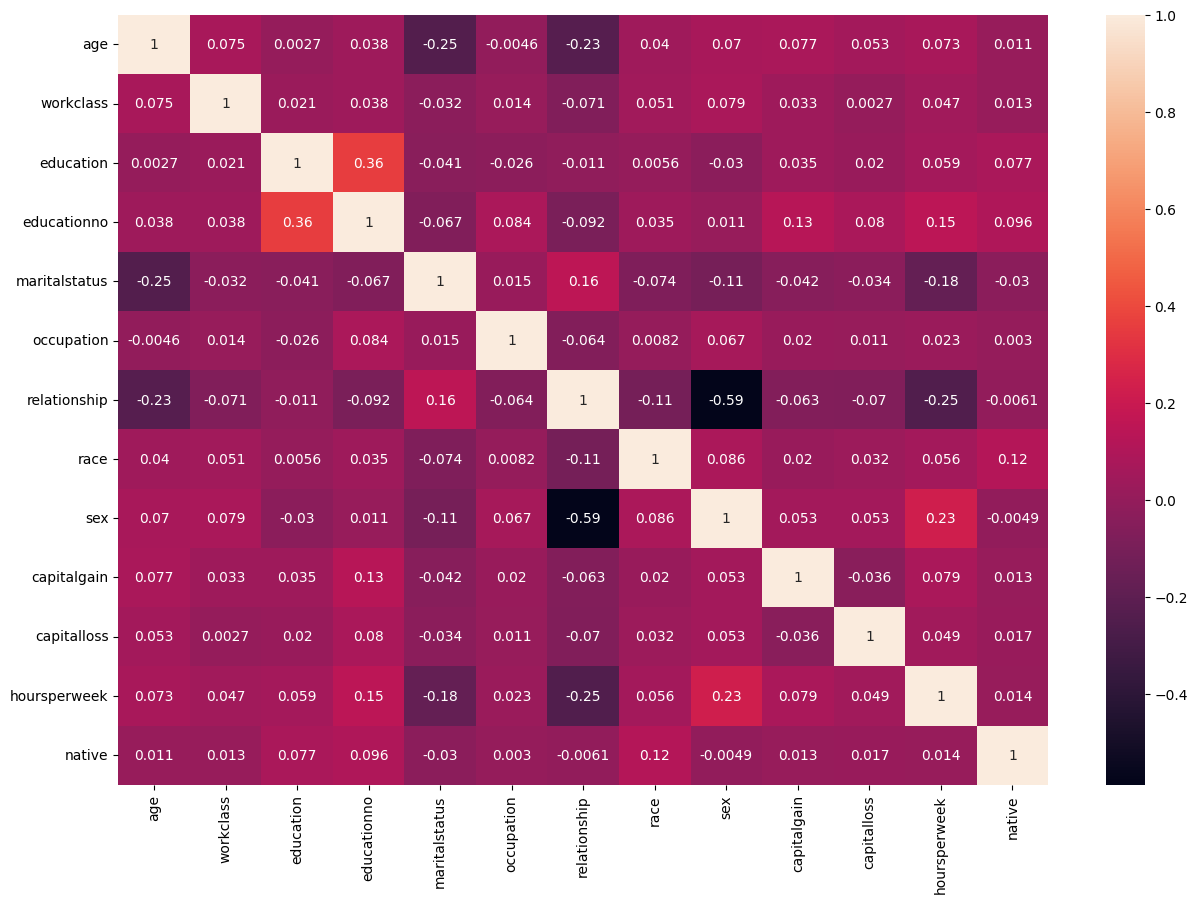

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(xtrain.corr(),annot=True)

**MultinomialNB**

In [31]:
mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)
ypred = mnb.predict(xtest)
print(classification_report(ytest,ypred))
print(mnb.score(xtrain,ytrain))
print(mnb.score(xtest,ytest))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.86     10620
        >50K       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130

0.7683158012117608
0.7733899504600141


In [32]:
# Hyperparameter Tuning

params={'alpha': [0.001, 0.1, 1, 2]}

mnb = GridSearchCV(estimator=mnb, 
                 param_grid=params,  
                 verbose=1, 
                 scoring='accuracy') 
mnb.fit(xtrain, ytrain)

mnb.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'alpha': 0.001}

In [33]:
mnb = MultinomialNB(alpha= 0.001)
mnb.fit(xtrain,ytrain)
ypred = mnb.predict(xtest)
print(classification_report(ytest,ypred))
print(mnb.score(xtrain,ytrain))
print(mnb.score(xtest,ytest))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.86     10620
        >50K       0.62      0.22      0.33      3510

    accuracy                           0.77     14130
   macro avg       0.71      0.59      0.60     14130
weighted avg       0.75      0.77      0.73     14130

0.7683158012117608
0.7733899504600141


**GaussianNB**

In [34]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
ypred = gnb.predict(xtest)
print(classification_report(ytest,ypred))
print(gnb.score(xtrain,ytrain))
print(gnb.score(xtest,ytest))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     10620
        >50K       0.68      0.34      0.45      3510

    accuracy                           0.80     14130
   macro avg       0.74      0.64      0.66     14130
weighted avg       0.78      0.80      0.77     14130

0.7933687692822362
0.7951875442321302


In [35]:
# Hyperparameter Tuning

params = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GridSearchCV(estimator=gnb, 
                 param_grid=params,  
                 verbose=1, 
                 scoring='accuracy') 
gnb.fit(xtrain, ytrain)

gnb.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.001873817422860383}

In [36]:
gnb = GaussianNB(var_smoothing=0.001873817422860383)
gnb.fit(xtrain,ytrain)
ypred = gnb.predict(xtest)
print(classification_report(ytest,ypred))
print(gnb.score(xtrain,ytrain))
print(gnb.score(xtest,ytest))

              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88     10620
        >50K       0.73      0.30      0.43      3510

    accuracy                           0.80     14130
   macro avg       0.77      0.63      0.65     14130
weighted avg       0.79      0.80      0.77     14130

0.7970858268594581
0.7980184005661712
